> `Almost all ML models follows a basic workflow. This nootebook aims at providing the basic template for carrying out all the steps in common ML projects from defining the problem statement and data preprocessing to all the way up to model development.`

## INDEX

1. Introduction
2. Frame the Problem statement
3. Data Collection
4. Importing dependencies
     - Importing necessary libraries
     - Importing the dataset
5. Exploratory Data Analysis
    - Data Loading and Description
    - Data Profiling
    - Understanding the Dataset
    - Outlier Detection
    - Inspecting the dataset
    
6. Data Preparation
    - Handling Missing Values
      - Droping Techniques
      - Feature Imputation
    - Feature Encoding
      - One Hot Encoding
      - Label Encoding
    - Feature Scaling
    - Feature Engineering
    - Feature Selection
      - Dimensionality Reduction
      - Feature importance
    


7. Data Split

8. Model Development
  - Choosing an Algorithm 
  - Training the model
9. Model Evaluation
10. Fine-tuning the Model
11. Model Deployment
   

12. Conclusions




##1. Introduction: 

Many steps in common machine learning problems are repeated iteratively. Above mentions most of the steps, in order, to follow along. The most important step is to figure our whether the concerned problem statemant is a suitable machine leaning problem.

## 2. Frame the Problem Statement: 

Problem statement can vary for different ML learnig problems.

For Supervised Learning : Choosing the right, strategic decision-making features out of the possible predictors in the dataset to predict the target accurately.

For Unsupervised Learning : Analzing patterns out of a data to optimize productions.


## Data Collection
Based on:
- What kind of problem are we trying to solve?
- What data sources already exist?
- Any privacy concerns related to the data?
- Where should the data be stored?


##3. Importing dependancies:
   - Importing necessary libraries

In [ ]:
# basic libraries or modules

import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling                                            
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
sns.set()

# rest modules can be installed as per need

- Importing the dataset

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing dataset from drive

In [ ]:
path='..'
test_path = '..'
my_data=pd.read_excel(path) # in case of excel files
my_data = pd.read_csv(path, sep=" ; ")  # in case of csv files, sep to be mentioned if the values are separated not by commas

my_test_data = pd.read_csv(test_path)

 ## 4. Exploratory Data Analysis
  - Data Loading and Description

In [ ]:
my_data.head(10)  # prints the first 10 entries of the dataframe

In [ ]:
my_data.tail(8)  # prints the last 8 entries of the dataframe

## 5. Data profiling

To understand the Data structure

In [ ]:
my_data.shape   # (no. of rows, no. of cols)

In [ ]:
my_data.columns   # array of all features in our dataset

In [ ]:
my_data.info(verbose = True)  # This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage 

In [ ]:
my_data.describe()  # This method prints statistical information about the numerical feature of a DataFrame 

In [ ]:
from pandas_profiling import ProfileReport
profile = pandas_profiling.ProfileReport(my_data)  # or
profile = pandas_profiling.ProfileReport(my_data.sample(n=10000), minimal =True)  # for simplified report with firat 10000 entries
profile.to_file(outputfile="my_data_before_preprocessing.html")

In [ ]:
my_data.isnull().sum()   # series of null value count of all the features

Information of the data

##Dataset info

- Number of variables	- 
- Number of observations - 

###Variables types

- Structured or Unstructured - 
- Numeric	- 
- Categorical	- 
- Boolean	- 
- Time Series	- 
- Ordinal - 





There are total ... columns in the dataset namely
...

###To find the unique values calumns in the dataset

In [ ]:
categorical_features=[feature for feature in my_data.columns if my_data[feature].dtypes=='O']
print(categorical_features)
my_data[categorical_features_in_train].head()

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(my_data[feature].unique())))

In [ ]:
low_card_categorical_feature = [col for col in categorical_features if my_data[col].nunique()<10 ]
print("Low cardinality categorical feature" : , low_card_categorical_feature )

In [ ]:
numerical_features = [feature for feature in my_data.columns if my_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# Preview of the numerical variables
my_data[numerical_features].head()

In [ ]:
total_cols = low_card_categorical_feature + numerical_features
my_data_reduced = my_data[total_cols].copy()
my_data_reduced.head()

In [ ]:
for cols in my_data.columns: 
  print(f'The unique values in {col}: {my_data[col].unique()}')

In [ ]:
for cols in my_data.columns: 
  print(f'No. of unique values in {col}: {my_data[col].nunique()}')

In [ ]:
for cols in my_data.columns: 
  print(f'No. of unique values in {col}: {my_data[col].nunique()}')    #returns object containing counts of unique values.

## Outlier Detection

In [ ]:
for cols in my_data.columns:
  my_data.boxplot(column=cols, by='quality', grid=False)

#Data Visualisation

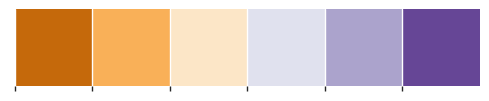

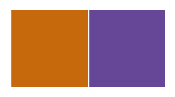

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purpole to orange colors
pal=sns.color_palette('PuOr',6) #To print 6 shades from purple to orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697'] #orange purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
my_data.hist(bins=20 ,figsize=(10,10))

## Data Preparation

## Handling Missing Values

In [ ]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if my_data[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(strategy = 'median')   # there can be other strategy like most_frequent or mean 
imputed_data = pd.DataFrame(my_imputer.fit_transform(my_data))

# Imputation removed column names; put them back
imputed_data.columns = my_data.columns

In [ ]:
# Make copy to avoid changing original data (when imputing)   # Next, we impute the missing values, while also keeping track of which values were imputed.
data_plus = X_train.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    data_plus[col + '_was_missing'] = data_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_data_plus = pd.DataFrame(my_imputer.fit_transform(data_plus))

# Imputation removed column names; put them back
imputed_data_plus.columns = data_plus.columns

## Feature Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(my_data[low_card_categorical_feature]))

OH_cols_train.index = my_data.index

num_X_train = my_data.drop(categorical_col, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

object_cols =  categorical_features
# Make copy to avoid changing original data 
label_X_train = my_data.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(my_data[object_cols])

## Feature Scaling

In [ ]:
feature_scale=[feature for feature in OH_X_train.columns ]
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance.
np.random.seed(42)

scaler=StandardScaler()
scaler.fit(OH_X_train[feature_scale])
scaler.transform(OH_X_train[feature_scale])

In [ ]:
from sklearn.preprocessing import MinMaxScaler  #Transform features by scaling each feature to a given range or default in between 0 to 1

scaler=MinMaxScaler()
scaler.fit(OH_X_train[feature_scale])
scaler.transform(OH_X_train[feature_scale])

## Feature Engineering

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. A feature is a property shared by independent units on which analysis or prediction is to be done. Features are used by predictive models and influence results. Now, a single feature can be used independent or can be combined with other available features for better feature generation. It depends on a use case and problem.

## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   # here, the code projects the original data which is total dimensional into 2 dimensions.
principalComponents = pca.fit_transform(my_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

`PCA` is one of the most common ways of feature reduction and extraction.

## Data Split

In [ ]:
#Seprating features and labels (X and y)
X = my_data.drop(['target'],axis=1)   #target is the target column
y = df['target']


#Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=42)  # we can specify a different test_size

print(X_train_full.shape , X_valid_full.shape, y_train.shape, y_valid.shape)  

## Feature Importance (Post-modelling)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif  
selector = SelectKBest(f_classif, k=4)  # for 4 best features
selector.fit(X_train_full, y_train)

In [ ]:
cols = selector.get_support(indices=True)
cols

In [ ]:
selector.scores_  # We can also verify by the F-scores of the features from the above cell.

In [ ]:
X_train_s = X_train_full.iloc[:,cols]   ## chosing our best 4 features
X_valid_s = X_valid_full.iloc[:,cols]

In [ ]:
X_train_final = 
X_valid_final =

## Model Development

There are numerous model choices for us. We may regression or classification choose model as per our problem.

In [ ]:
from sklearn.linear_model import SGDRegressor   # regressor SGD
model = SGDRegressor(random_state=1)
model.fit(X_train_final,y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor      # tree algorithm (regressor)

model = DecisionTreeRegressor(random_state=0, max_depth= 10)
model.fit(X_train_final,y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor   # ensemble modeling  (regressor)
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_final, y_train)

## Model Evaluation

In [ ]:
preds = model.predict(X_valid_final)

#Evaluating our estimator
from sklearn.metrics import mean_absolute_error

score = mean_absolute_error(y_valid, preds)            # common metrices for regression model
print("MAE:",score)

In [ ]:
from sklearn import metrics                                   # common metrices for classification model
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("Recal:" , metrics.recall_score(y_test, preds))
print("precision:" , metrics.precision_score(y_test, preds))
print("f1_score:" , metrics.f1_score(y_test, preds))

## Fine-Tuning the Model

In [ ]:
from xgboost import XGBRegressor   # boosting algorithm (regressor)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

model =  XGBRegressor()


random_search = RandomizedSearchCV(estimator=model,
            param_distributions=params,
            cv=5, n_iter=5,
            scoring = 'neg_mean_absolute_error',
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
predictions = my_model.predict(OH_test)

In [ ]:
random_search.best_estimator_

In [ ]:
random_search.best_params_

In [ ]:

my_model=XGBRegressor(....)  # replace the .... with the best parameters given by randomized search

We acn reevaluate our model and iterate our training here.

## Model Deployment

## Conclusion

Take the space to explain the motive of your final model.